# 1 Download the Dataset
kindly download:
Download the Dataset
Download the dataset to your local computer in the project directory of your choice.
results.csv includes the following columns:
date - date of the match home_team - the name of the home team away_team - the name of the away team home_score - full-time home team score including extra time, not including penalty-shootouts away_score - full-time away team score including extra time, not including penalty-shootouts tournament - the name of the tournament city - the name of the city/town/administrative unit where the match was played country - the name of the country where the match was played neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
Note on team and country names:
For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.
For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

# 2 Reading the Dataset
* Read the dataset into the Pandas DataFrame!
* Does the dataset include any missing values? If so, delete the missing values’ entries!
Hint: Pandas can do that with one line of code!

In [1]:
import pandas as pd
df = pd.read_csv("results.csv").dropna()

In [2]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 3 Exploring the Dataset
Answer the following questions about the dataset using Python commands:
* How many tuples are there in the dataset?
* How many tournaments are there in the dataset?
Hint: each question should require few lines of code!

In [3]:
Tuples = len(df)
Tournaments = len(df.tournament)
print(Tuples,Tournaments)

42650 42650


# 4 Convert and Deduce
* Convert the column date to timestamps!
* Find out how many matches in the dataset were played in 2018.
Hint: use the date column.

In [4]:
df['date'] = pd.to_datetime(df['date'])
matches_2018 = len(df[df['date'].dt.year == 2018])

print(f"Number of matches played in 2018: {matches_2018}")

Number of matches played in 2018: 908


In [5]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
len(df[df['date'].dt.year == 2018])

908

# 5 Team Statistics
Calculate how many times the home team won, lost, or had a draw.

In [15]:
#Home team won
home_team_wins = len(df[df['home_score'] > df['away_score']])
home_team_wins

20739

In [16]:
#Home team lost
home_team_lost = len(df[df['home_score'] < df['away_score']])
home_team_lost

12074

In [18]:
#Home team draw
draws = len(df[df['home_score'] == df['away_score']])
draws

9837

# 6 Visualization
* Plot the numbers extracted from Step 5 in a pie chart.
* Plot the neutral column as a pie chart.
Hint: try to Visualize the neutral column using Pandas (only one line of code).

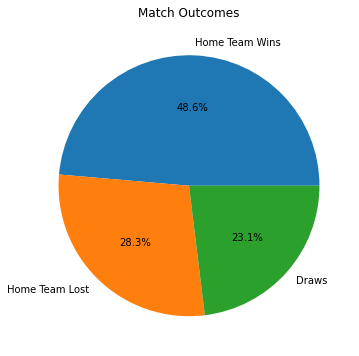

In [23]:
import matplotlib.pyplot as plt
game_results = [home_team_wins, home_team_lost, draws]
labels = ['Home Team Wins', 'Home Team Lost', 'Draws']

plt.figure(figsize=(10, 6))
plt.pie(game_results, labels=labels, autopct='%1.1f%%')
plt.title('Match Outcomes')
plt.show()

<AxesSubplot:ylabel='neutral'>

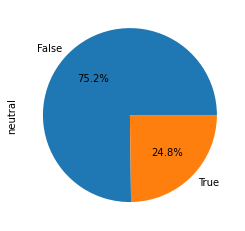

In [25]:
df['neutral'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [26]:
df['neutral'].value_counts()

False    32076
True     10574
Name: neutral, dtype: int64

# 7 Unique Teams
How many unique teams are there in the dataset? Find out!

In [39]:
len(pd.unique(pd.concat([df['home_team'], df['away_team']])))

313